## 1. 대회 소개

#### 1-1) column 값
- id : 날짜와 시간별 id
- hour_bef_temperature : 1시간 전 기온
- hour_bef_precipitation : 1시간 전에 비가 왔으면 1, 오지 않았으면 0
- hour_bef_windspeed : 1시간 전 평균 풍속
- hour_bef_humidity : 1시간 전 습도
- hour_bef_visibility : 1시간 전 시정
- hour_bef_ozone : 1시간 전 오존
- hour_bef_pm10 : 1시간 전 미세먼지 농도
- hour_bef_pm2.5 : 1시간 전 초미세먼지 농도
- count : 시간에 따른 따릉이 대여 수 (Target값) 

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('./train.csv')
print(f"columns : {data.columns.tolist()}")

columns : ['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']


#### 1-2) 평가 지표
- RMSE : Root Mean Square Error

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$$RMSE(\hat{\theta}) = \sqrt{MSE(\hat{\theta})} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2}$$

In [6]:
from sklearn.metrics import mean_squared_error
y = [1, 2]
y_pred = [1, 0]

mse = mean_squared_error(y, y_pred, squared=True)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"MSE : {mse}, RMSE : {rmse}")
print(f"      {2.0},        {np.sqrt(2.0)}")

MSE : 2.0, RMSE : 1.4142135623730951
      2.0,        1.4142135623730951


## 2. Hint - preprocessing & EDA

 참고용입니다.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [8]:
data

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


#### 2-1) 결측값 확인

In [9]:
data.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

#### 2-2) 이상치 확인

https://yoon1seok.tistory.com/38

column : hour_bef_temperature


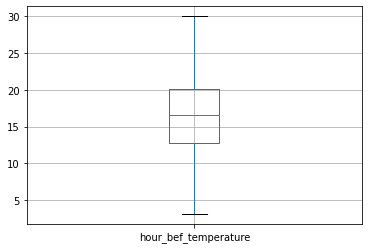

In [10]:
'''
box-plot 시각화
'''
index = 2 # index 번호를 바꾸면서 이상치 확인
print(f"column : {data.columns[index]}")
data.boxplot(data.columns[index])

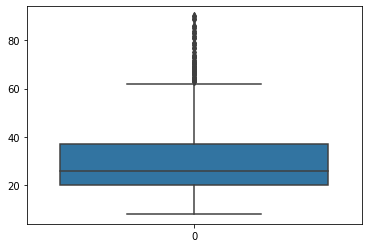

In [11]:
'''
seaborn을 통한 box-plot 시각화
'''
sns.boxplot(data=data['hour_bef_pm2.5'])

#### 2-3) 이상치 처리

In [12]:
# 1. np.sqrt

data['sqrt_bef_pm2.5'] = np.sqrt(data['hour_bef_pm2.5'])
data[['hour_bef_pm2.5', 'sqrt_bef_pm2.5']]

,hour_bef_pm2.5,sqrt_bef_pm2.5
0,33.0,5.744563
1,40.0,6.324555
2,19.0,4.358899
3,64.0,8.000000
4,11.0,3.316625
...,...,...
1454,27.0,5.196152
1455,19.0,4.358899
1456,21.0,4.582576
1457,36.0,6.000000


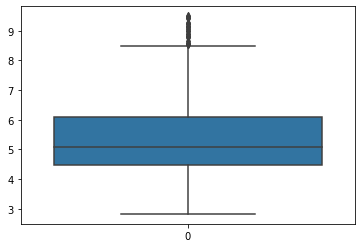

In [13]:
# np.sqrt를 통한 이상치 처리 결과

sns.boxplot(data=data['sqrt_bef_pm2.5'])

In [14]:
# 2. np.log1p

data['log_bef_pm2.5'] = np.log1p(data['hour_bef_pm2.5'])
data[['hour_bef_pm2.5', 'log_bef_pm2.5']]

,hour_bef_pm2.5,log_bef_pm2.5
0,33.0,3.526361
1,40.0,3.713572
2,19.0,2.995732
3,64.0,4.174387
4,11.0,2.484907
...,...,...
1454,27.0,3.332205
1455,19.0,2.995732
1456,21.0,3.091042
1457,36.0,3.610918


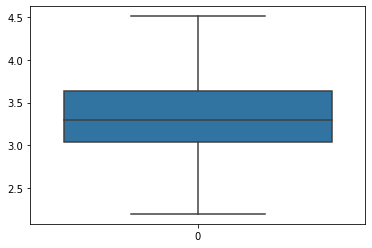

In [15]:
# np.log1p를 통한 이상치 처리 결과

sns.boxplot(data=data['log_bef_pm2.5'])

#### 2-4) 시간별 count(target)값 그래프

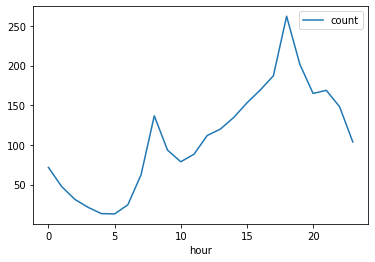

In [16]:
data[['hour', 'count']].groupby('hour').mean().plot()

#### 2-5) Correlation heatmap
- 각 column과 target(count)과의 상관관계를 확인

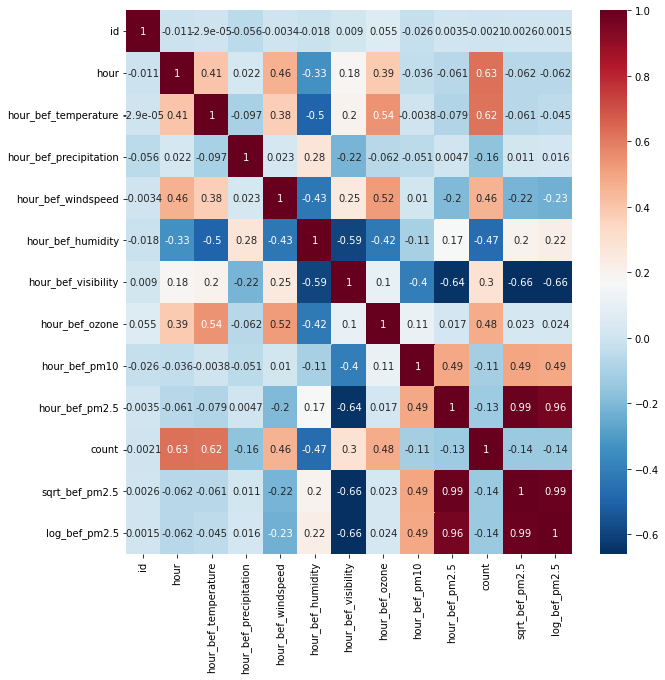

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True,cmap="RdBu_r")

## 3. Hint - Model

#### 모델 추천
사용법은 Document의 Example 부분에 자세히 나와있습니다.

- Extra Trees Regressor : 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

- Linear Regressor : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


- Gradient Boosting Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


- AdaBoost Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

- Random Forest Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
